# Modeling

# Importance of the Modeling Phase in Data Science

## 1. Introduction
The modeling phase is one of the most crucial stages in a data science project. This phase involves selecting and applying appropriate modeling techniques to our data to build a model that can make accurate predictions or provide valuable insights.

## 2. Purpose of Modeling
The goal of modeling is to transform processed data into useful information. Depending on the type of problem being addressed, this could mean classifying data, predicting continuous values, grouping data into categories, among others. The success of the project largely depends on the model's effectiveness in extracting significant patterns and making accurate predictions.

## 3. Model Selection
Choosing the right model is fundamental. Different problems require different types of models. For example:
- **Classification Models:** When the goal is to categorize data (e.g., spam/not spam).
- **Regression Models:** When the goal is to predict a continuous value (e.g., house price).
- **Clustering Models:** To find natural groups within the data (e.g., customer segmentation).


In this specific project the purpose is to predict continuous values and the objective is to test at least 3 different models to measure their performance.

## 4. Importance of Model Evaluation
Once a model is selected and trained, it's essential to evaluate its performance using appropriate metrics. This helps to understand whether the model is accurate enough and if it will generalize well to unseen data. Common metrics include accuracy, recall, F1-score for classification, and RMSE, MAE for regression.
In this particular study as our output variable is continous we will use Rsquare and MSE

# Importance of Hyperparameter Tuning

## 1. Concept of Hyperparameters
Hyperparameters are settings that are defined before the learning process begins. Unlike model parameters, which are adjusted automatically during training, hyperparameters need to be set manually. Examples of hyperparameters include the learning rate, the depth of trees in a random forest model, the number of neurons in a layer of a neural network, etc.

## 2. Impact on Model Performance
Proper hyperparameter tuning can significantly improve the model's performance. Poorly configured hyperparameters can lead to a suboptimal model that does not generalize well and might suffer from issues such as overfitting or underfitting.

## 3. Hyperparameter Tuning Techniques
There are several techniques for hyperparameter tuning, we are going to use 2 in this study:
- **Grid Search:** Exhaustively trying all possible combinations of hyperparameters within a specified set.
- **Random Search:** Trying random combinations of hyperparameters, which can be more efficient than grid search.

## 4. Cross-Validation
Cross-validation is a technique used alongside hyperparameter tuning to evaluate the model on different partitions of the dataset, ensuring that the results are consistent and that the model is not overfitted to a single partition of the data.


### LETS START CODING

In [1]:
#Import the relevant libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


Pull the Dataframe that was adjusted during feature engineering

In [2]:
df_encoded = pd.read_csv('df_encoded.csv')

In [3]:
df_encoded.head()


,Schooling_Bins_Low,Schooling_Bins_Medium,Schooling_Bins_High,Schooling_Bins_Very High,Age_Bins_Young Adult,Age_Bins_Adult,Age_Bins_Middle Age,Age_Bins_Senior,Age_Bins_Elder,COMPETITOR_Votes_2024,...,Median_Age,Adults,Total_Population,Urbanization_Ratio,Poverty_Rate,Healthcare_Demand,Income_vs_Poverty,Log_GDP_per_Capita,Log_Income_per_Capita,Log_Vehicles_per_Capita
0,False,True,False,False,True,False,False,False,False,-0.826256,...,-1.16692,-0.760959,-0.778683,-0.179094,-0.818624,-0.107315,-0.684212,-0.054838,1.050425,0.573788
1,False,True,False,False,False,False,True,False,False,-0.191047,...,0.58346,0.034264,-0.052355,0.344803,-0.898666,-0.158091,-0.752846,0.013539,-0.172075,1.148203
2,False,True,False,False,False,True,False,False,False,-0.927750,...,0.00000,-0.931093,-0.973068,-0.106661,-0.991260,-0.088872,-0.888999,-0.054285,3.063130,2.145926
3,False,True,False,False,False,True,False,False,False,-0.858104,...,0.00000,-0.904481,-0.932801,-0.273967,0.483175,-0.130636,0.495079,0.670421,1.305532,-0.224699
4,False,False,False,False,False,False,False,False,False,0.513474,...,-2.91730,1.828805,1.634029,-0.381746,1.698576,-0.401373,0.844107,-0.608122,-0.995469,1.862265


In [4]:
df_encoded.shape

(32, 34)

In [5]:
df_encoded.columns

Index(['Schooling_Bins_Low', 'Schooling_Bins_Medium', 'Schooling_Bins_High',
       'Schooling_Bins_Very High', 'Age_Bins_Young Adult', 'Age_Bins_Adult',
       'Age_Bins_Middle Age', 'Age_Bins_Senior', 'Age_Bins_Elder',
       'COMPETITOR_Votes_2024', 'Urban_Polling_Stations',
       'Non_Urban_Polling_Stations', 'AMLO_2018', 'GDP_2024',
       'Federal_Social_Welfare_Budget', 'Sheinbaum_MORENA_Events',
       'Average_Schooling_Years', 'Avg_Income_Yr', 'Extreme_Poberty_habitants',
       'Poberty_Habitants', 'Public_Hospital_Users', 'Total_Vehicles',
       'Catholic_Believers', 'Murders_Yr', 'Median_Age', 'Adults',
       'Total_Population', 'Urbanization_Ratio', 'Poverty_Rate',
       'Healthcare_Demand', 'Income_vs_Poverty', 'Log_GDP_per_Capita',
       'Log_Income_per_Capita', 'Log_Vehicles_per_Capita'],
      dtype='object')

COMPETITOR_Votes_2024 is the Response Variable (Y output)

In [6]:
#check if there are null values in my dataset
df_encoded.isnull().sum()


Schooling_Bins_Low               0
Schooling_Bins_Medium            0
Schooling_Bins_High              0
Schooling_Bins_Very High         0
Age_Bins_Young Adult             0
Age_Bins_Adult                   0
Age_Bins_Middle Age              0
Age_Bins_Senior                  0
Age_Bins_Elder                   0
COMPETITOR_Votes_2024            0
Urban_Polling_Stations           0
Non_Urban_Polling_Stations       0
AMLO_2018                        0
GDP_2024                         0
Federal_Social_Welfare_Budget    0
Sheinbaum_MORENA_Events          0
Average_Schooling_Years          0
Avg_Income_Yr                    0
Extreme_Poberty_habitants        0
Poberty_Habitants                0
Public_Hospital_Users            0
Total_Vehicles                   0
Catholic_Believers               0
Murders_Yr                       0
Median_Age                       0
Adults                           0
Total_Population                 0
Urbanization_Ratio               0
Poverty_Rate        

### Lets Split the data in Training and Testing

In [7]:
# SEPARATE X AND Y DATA
X = df_encoded.drop('COMPETITOR_Votes_2024', axis=1)
y = df_encoded['COMPETITOR_Votes_2024']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree
Lets start simple with a decision tree...

In [9]:
# Normalizating the data
from sklearn.preprocessing import StandardScaler

# Supongamos que X_train y X_test están definidos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Create the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_tree = tree_model.predict(X_train_scaled)
y_test_pred_tree = tree_model.predict(X_test_scaled)

# Evaluate the performance
mse_train_tree = mean_squared_error(y_train, y_train_pred_tree)
r2_train_tree = r2_score(y_train, y_train_pred_tree)
mse_test_tree = mean_squared_error(y_test, y_test_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)


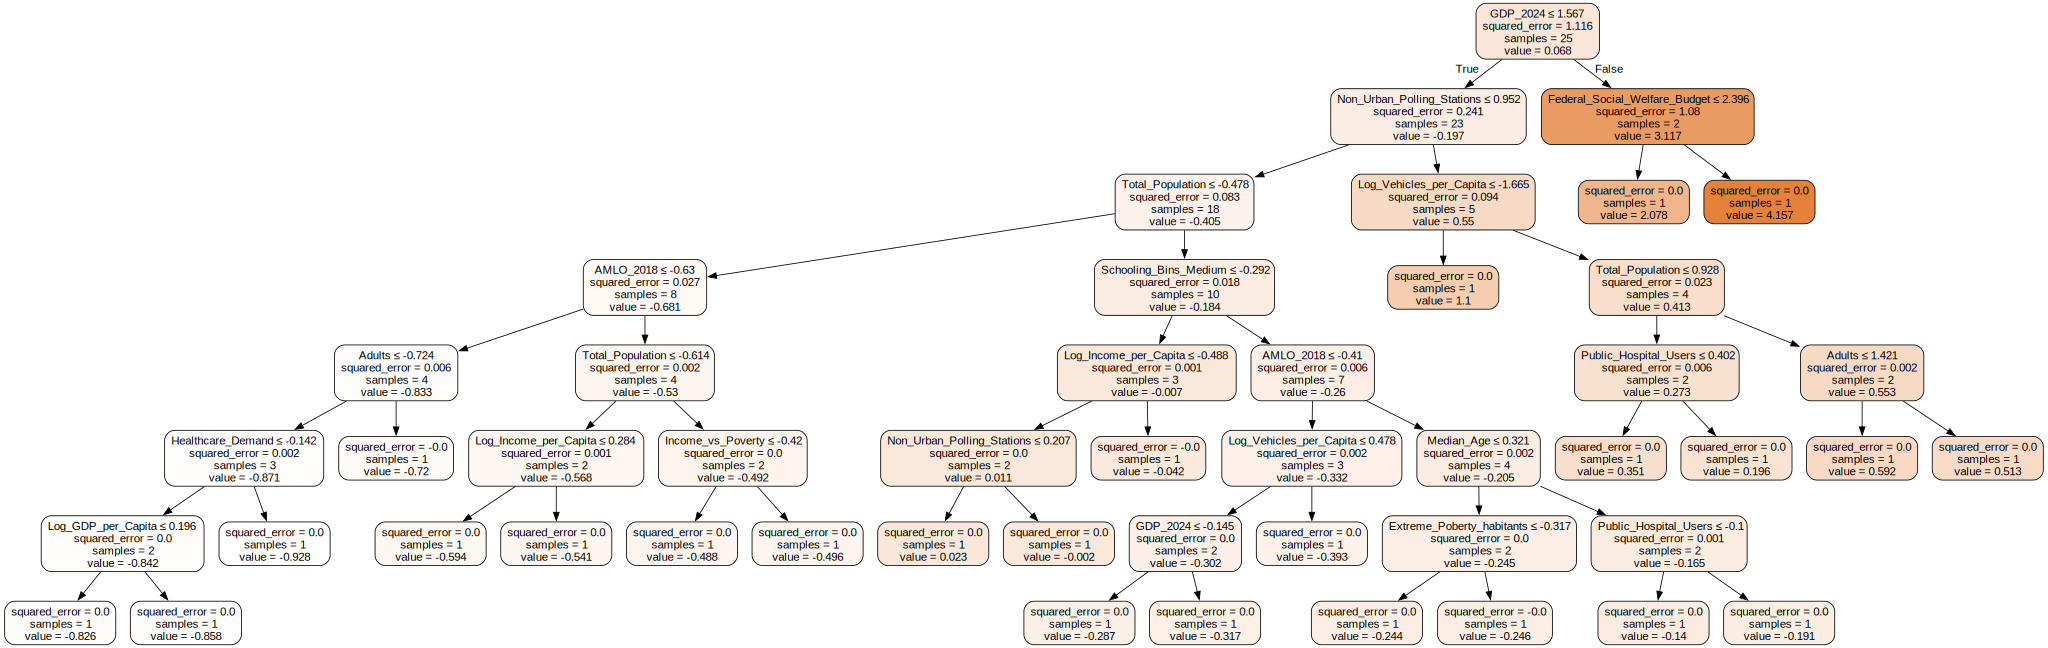

In [11]:
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol de decisión en formato DOT
dot_data = export_graphviz(tree_model, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)

# Usar graphviz para renderizar el archivo DOT
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Esto guarda el árbol como un archivo llamado "decision_tree.pdf"
graph


The model has a lot of branches and a lot of leafs... its difficult to read and interpret.. but lets see how it performs:

In [12]:

print('\033[93m')
print(f'Decision Tree Train Mean Squared Error: {mse_train_tree:.2f}')
print(f'Decision Tree Train R^2 Score: {r2_train_tree:.2f}')
print(f'Decision Tree Test Mean Squared Error: {mse_test_tree:.2f}')
print(f'Decision Tree Test R^2 Score: {r2_test_tree:.2f}')


Decision Tree Train Mean Squared Error: 0.00
Decision Tree Train R^2 Score: 1.00
Decision Tree Test Mean Squared Error: 0.13
Decision Tree Test R^2 Score: 0.75


The model seems to be overfitting because training data is getting 100% Rsquare. 

Lets visualize how it performs in Testing:

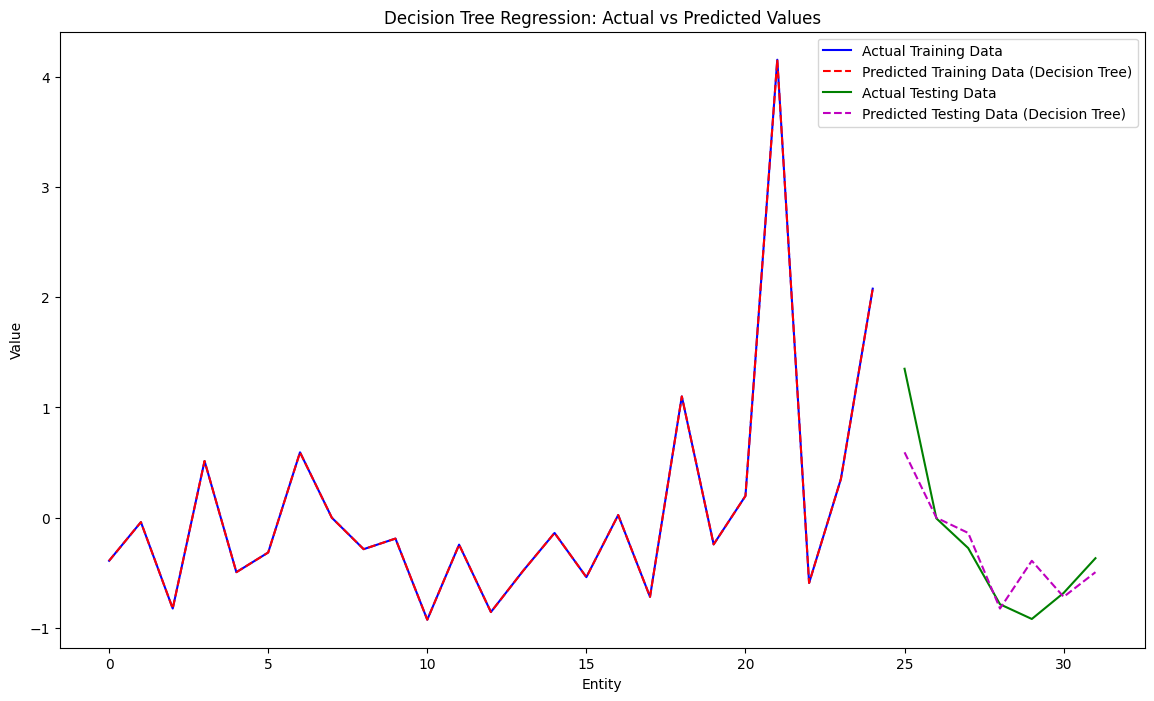

In [13]:
# Plotting Actual vs Predicted for Training and Testing Data
entities_train = np.arange(len(y_train))
entities_test = np.arange(len(y_test)) + len(y_train)

plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(entities_train, y_train, 'b-', label='Actual Training Data')
plt.plot(entities_train, y_train_pred_tree, 'r--', label='Predicted Training Data (Decision Tree)')

# Plot testing data
plt.plot(entities_test, y_test, 'g-', label='Actual Testing Data')
plt.plot(entities_test, y_test_pred_tree, 'm--', label='Predicted Testing Data (Decision Tree)')

plt.xlabel('Entity')
plt.ylabel('Value')
plt.title('Decision Tree Regression: Actual vs Predicted Values')
plt.legend()
plt.show()

The model is overfited in training and follows the trend of Testing but with low accuracy

## Random Forest Model

Now lets do a Random forest Model

In [14]:
# Create the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# train it
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Evaluate Performance

In [15]:
# Make Predictins
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\033[93m')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 0.07
R^2 Score: 0.87


In [16]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Do the Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Train the grid search
grid_search.fit(X_train, y_train)

# Show the best hiperparameters found
print(f'Best parameters found: {grid_search.best_params_}')

# UUse the best model found
best_model = grid_search.best_estimator_

# Evaluate performance with this model
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print('\033[93m')
print(f'Mean Squared Error of the best model: {mse_best:.2f}')
print(f'R^2 Score of the best model: {r2_best:.2f}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_esti

### Plotting Actual vs Predicted Values

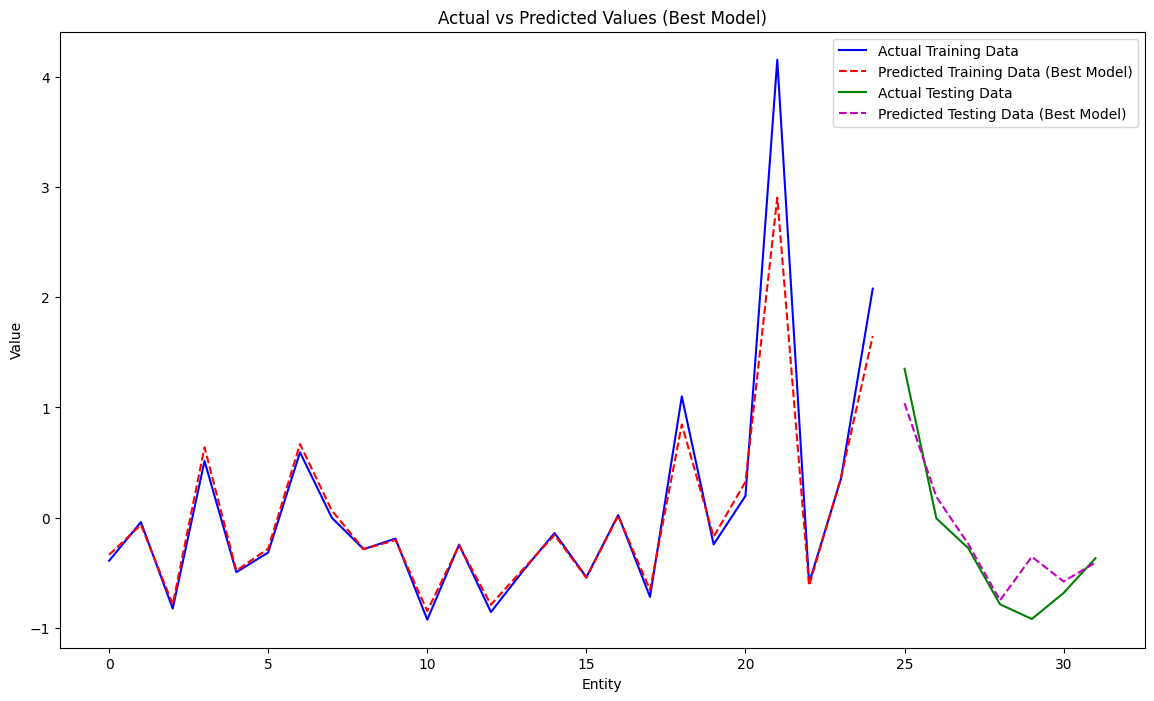

In [17]:
# Make predictions for the training data using the best model
y_train_pred_best = best_model.predict(X_train)

# Enumerate the entities
entities_train = np.arange(len(y_train))
entities_test = np.arange(len(y_test)) + len(y_train)

# Plotting
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(entities_train, y_train, 'b-', label='Actual Training Data')
plt.plot(entities_train, y_train_pred_best, 'r--', label='Predicted Training Data (Best Model)')

# Plot testing data
plt.plot(entities_test, y_test, 'g-', label='Actual Testing Data')
plt.plot(entities_test, y_pred_best, 'm--', label='Predicted Testing Data (Best Model)')

plt.xlabel('Entity')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values (Best Model)')
plt.legend()
plt.show()

The performance didn't improve with this Grid!

Potential reasons for this:

1. The model was already well optimized:
• The default parameters may have already been suitable for your specific problem.

2. The search range was not wide enough:
• The hyperparameter values I tried may not have included more optimal values.

3. The model might be limited by the data:
• Perhaps the model has already reached the maximum performance it can achieve with the current data. To improve this in further studies I might need this macro economic and demographic data per city and not only per entity to get more rows of data.


The prediction of the trend is good enough... but I wonder if there are other models that can predict more acurately the Votes.. Lets try others like Regression, Ridge, Lasso, etc.

But before moving on to other types of models I would like to double check if the Random Forest model can improve with other method, now I will use Random Search instead of Grid:

In [18]:
#Define hiper parameters to search
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create the Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Train the Randomized Search
random_search.fit(X_train, y_train)

# Show the best Hiperparameters found
print(f'Best parameters found: {random_search.best_params_}')

# Use the best model found
best_model = random_search.best_estimator_

# Evaluate the performance with this model
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)


print('\033[93m')
print(f'Mean Squared Error of the best model: {mse_best:.2f}')
print(f'R^2 Score of the best model: {r2_best:.2f}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=443; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=11, n_estimators=287; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=443; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=13, n_estimators=154

Ok the model performance didn't improved, but decreased a little bit, lets stop with Random Forest for a while and lests jump to other models

## LINEAR REGRESSION

In [19]:
# Crear el modelo de Regresión Lineal
linear_model = LinearRegression()

# Entrenar el modelo
linear_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_linear = linear_model.predict(X_test)

# Evaluar el rendimiento
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('\033[93m')
print(f'Linear Regression Mean Squared Error: {mse_linear:.2f}')
print(f'Linear Regression R^2 Score: {r2_linear:.2f}')


Linear Regression Mean Squared Error: 0.05
Linear Regression R^2 Score: 0.90


### Ridge 

In [20]:
# Normalizating the data
from sklearn.preprocessing import StandardScaler

# Supongamos que X_train y X_test están definidos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Lets Try Ridge Regression to try to improve the model acuracy

In [21]:
# Define the hyperparameter range
ridge_params = {'alpha': [0.1, 1, 10, 100, 1000]}

# Create the Ridge Regression model
ridge = Ridge()

# Hyperparameter tuning with GridSearchCV
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train_scaled, y_train)

# Best model
best_ridge = ridge_grid.best_estimator_

# Make predictions
y_pred_ridge = best_ridge.predict(X_test_scaled)

# Evaluate performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('\033[93m')
print(f'Ridge Regression Mean Squared Error: {mse_ridge:.2f}')
print(f'Ridge Regression R^2 Score: {r2_ridge:.2f}')


Ridge Regression Mean Squared Error: 0.05
Ridge Regression R^2 Score: 0.91


Perfect let's plot this Model with the Train and Test Data!

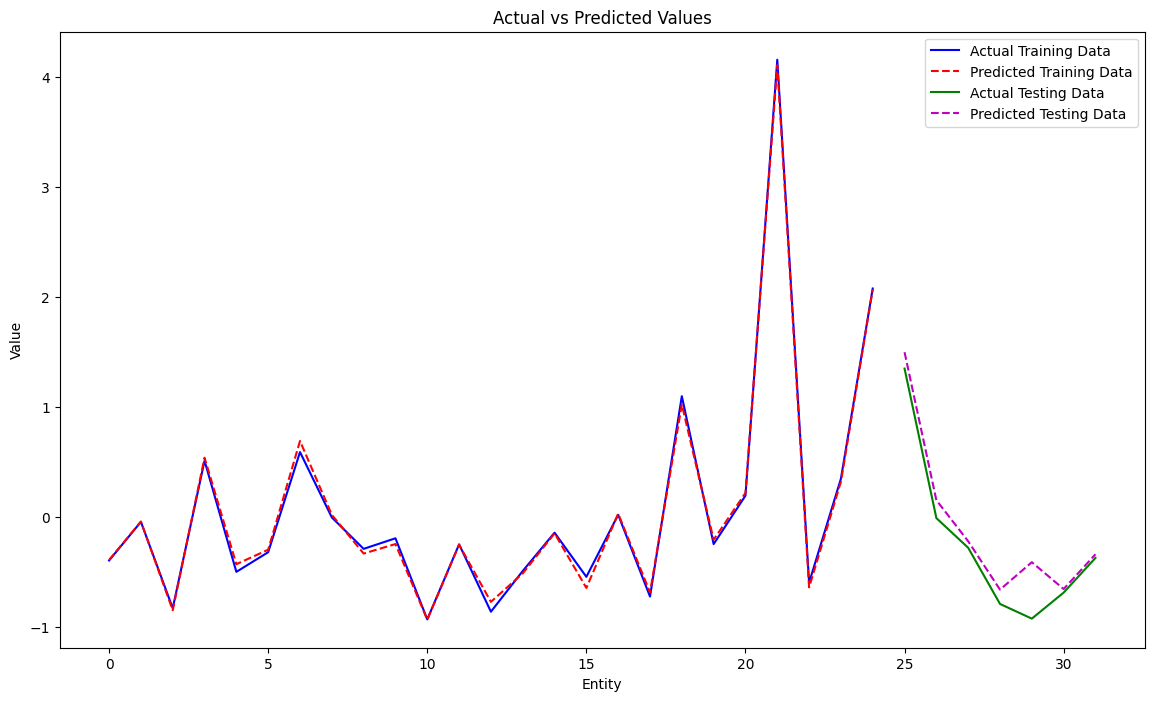

In [22]:
# Make predictions for the training data
y_train_pred = best_ridge.predict(X_train_scaled)

# numerate the entities
entities_train = np.arange(len(y_train))
entities_test = np.arange(len(y_test)) + len(y_train)

# Plotting
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(entities_train, y_train, 'b-', label='Actual Training Data')
plt.plot(entities_train, y_train_pred, 'r--', label='Predicted Training Data')

# Plot testing data
plt.plot(entities_test, y_test, 'g-', label='Actual Testing Data')
plt.plot(entities_test, y_pred_ridge, 'm--', label='Predicted Testing Data')

plt.xlabel('Entity')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## Lasso

In [23]:
# Definir el rango de hiperparámetros
lasso_params = {'alpha': [0.1, 1, 10, 100, 1000]}

# Crear el modelo de Lasso Regression
lasso = Lasso()

# Búsqueda de hiperparámetros
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train_scaled, y_train)

# Mejor modelo
best_lasso = lasso_grid.best_estimator_

# Hacer predicciones
y_pred_lasso = best_lasso.predict(X_test_scaled)

# Evaluar el rendimiento
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('\033[93m')
print(f'Lasso Regression Mean Squared Error: {mse_lasso:.2f}')
print(f'Lasso Regression R^2 Score: {r2_lasso:.2f}')


Lasso Regression Mean Squared Error: 0.01
Lasso Regression R^2 Score: 0.98


### Nice 0.98 R2 and 0.01 MSE loooks particularily amazing! lets try to plot Train and Test Data to see visually how this performs!

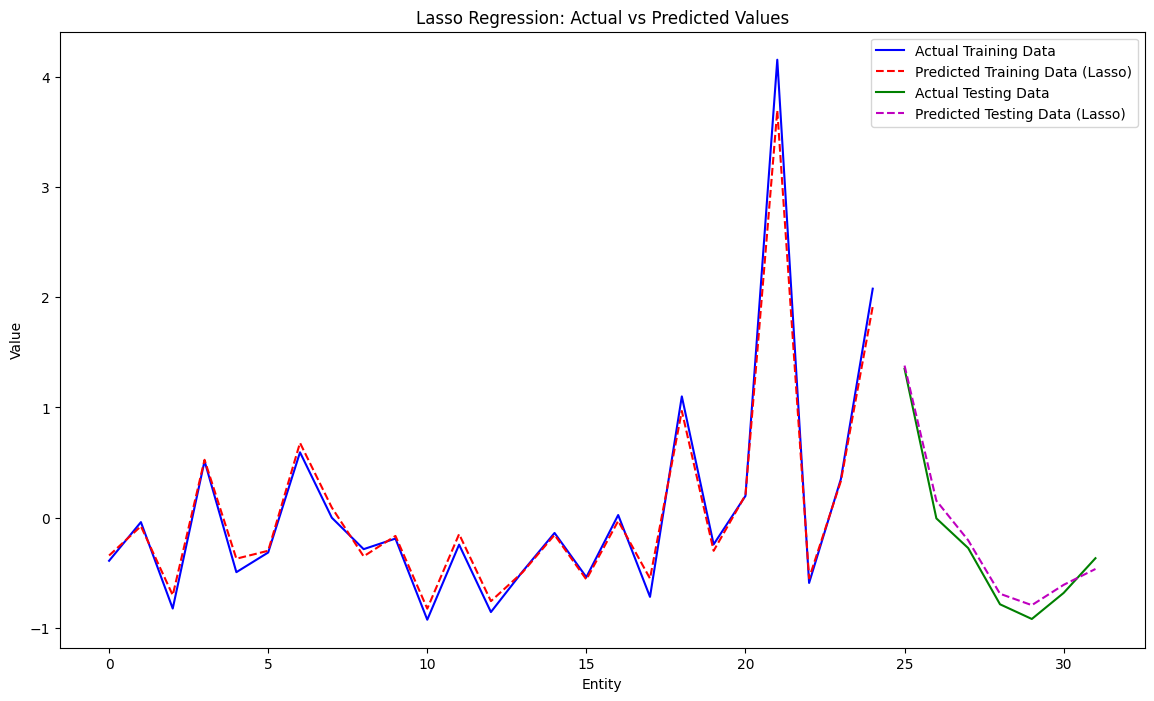

In [24]:
# Make predictions for the training data using Lasso
y_train_pred_lasso = best_lasso.predict(X_train_scaled)
y_test_pred_lasso = best_lasso.predict(X_test_scaled)

# Enumerate the entities
entities_train = np.arange(len(y_train))
entities_test = np.arange(len(y_test)) + len(y_train)

# Plotting
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(entities_train, y_train, 'b-', label='Actual Training Data')
plt.plot(entities_train, y_train_pred_lasso, 'r--', label='Predicted Training Data (Lasso)')

# Plot testing data
plt.plot(entities_test, y_test, 'g-', label='Actual Testing Data')
plt.plot(entities_test, y_test_pred_lasso, 'm--', label='Predicted Testing Data (Lasso)')

plt.xlabel('Entity')
plt.ylabel('Value')
plt.title('Lasso Regression: Actual vs Predicted Values')
plt.legend()
plt.show()

Lets see the equation of this Linear regression

In [25]:

# Get the feature names
feature_names = X.columns

# Get the coefficients
coefficients = best_lasso.coef_
lasso_equation = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

#Lets see Lasso Equation using only the terms that do impact the Y Output
lasso_equation = lasso_equation[lasso_equation['Coefficient'] != 0]

#Print the coefficients
print('\033[93m')
print('Lasso Coefficients:')
print(lasso_equation)


# Show the equation in Y = mx + b format
print('\033[93m')
print('Lasso Equation:')
print('Y = ', end='')
for i, row in lasso_equation.iterrows():
    if i == 0:
        print(f'{row["Coefficient"]:.2f} * {row["Feature"]}', end='')
    else:
        print(f' + {row["Coefficient"]:.2f} * {row["Feature"]}', end='')



Lasso Coefficients:
                  Feature  Coefficient
11              AMLO_2018     0.567453
18      Poberty_Habitants     0.202205
19  Public_Hospital_Users     0.209553

Lasso Equation:
Y =  + 0.57 * AMLO_2018 + 0.20 * Poberty_Habitants + 0.21 * Public_Hospital_Users

Lets do a simple dataframe to see visually the Predicted vs Actual values of my model:

In [26]:
Trial = df_encoded[['AMLO_2018', 'Poberty_Habitants', 'Public_Hospital_Users','COMPETITOR_Votes_2024']].head(32)

# Add a column of predictions using Lasso equation Y =  + 0.57 * AMLO_2018 + 0.20 * Poberty_Habitants + 0.21 * Public_Hospital_Users
Trial['Predicted'] = 0.57 * Trial['AMLO_2018'] + 0.20 * Trial['Poberty_Habitants'] + 0.21 * Trial['Public_Hospital_Users']

Trial.head(32)

,AMLO_2018,Poberty_Habitants,Public_Hospital_Users,COMPETITOR_Votes_2024,Predicted
0,-0.784717,-0.708203,-0.797036,-0.826256,-0.756307
1,-0.114355,-0.596000,-0.020271,-0.191047,-0.188639
2,-0.859376,-0.891052,-1.029173,-0.927750,-0.884181
3,-0.811660,-0.699060,-1.003236,-0.858104,-0.813138
4,0.481181,0.875105,0.405690,0.513474,0.534489
5,-0.437580,-0.489615,0.070957,-0.317427,-0.332443
6,2.642901,0.742123,1.680137,2.077906,2.007707
7,-0.335914,-0.532003,-0.161478,-0.243844,-0.331782
8,-0.802267,-0.855313,-1.058114,-0.920985,-0.850559
9,-0.706959,-0.544470,-0.695593,-0.684496,-0.657935


In [33]:
# Add a column to Trial dataframe with the difference between the actual and predicted values

Trial['Difference'] = Trial['COMPETITOR_Votes_2024'] - Trial['Predicted']

# Calculate the Mean Squared Error
mse_trial = (Trial['Difference'] ** 2).mean()

# Calculate the R^2 Score
r2_trial = 1 - (Trial['Difference'] ** 2).sum() / ((Trial['COMPETITOR_Votes_2024'] - Trial['COMPETITOR_Votes_2024'].mean()) ** 2).sum()


In [34]:
# Export this Trial dataframe to CSV file and call it ModelMetricsfile
Trial.to_csv('ModelMetricsfile.csv', index=False)

# Generate a new tab in the CSV with the MSE and Rsquared values
with open('ModelMetricsfile.csv', 'a') as f:
    f.write(f'Mean Squared Error,{mse_trial}\n')
    f.write(f'R^2 Score,{r2_trial}\n')


And now lets plot this dataframe:

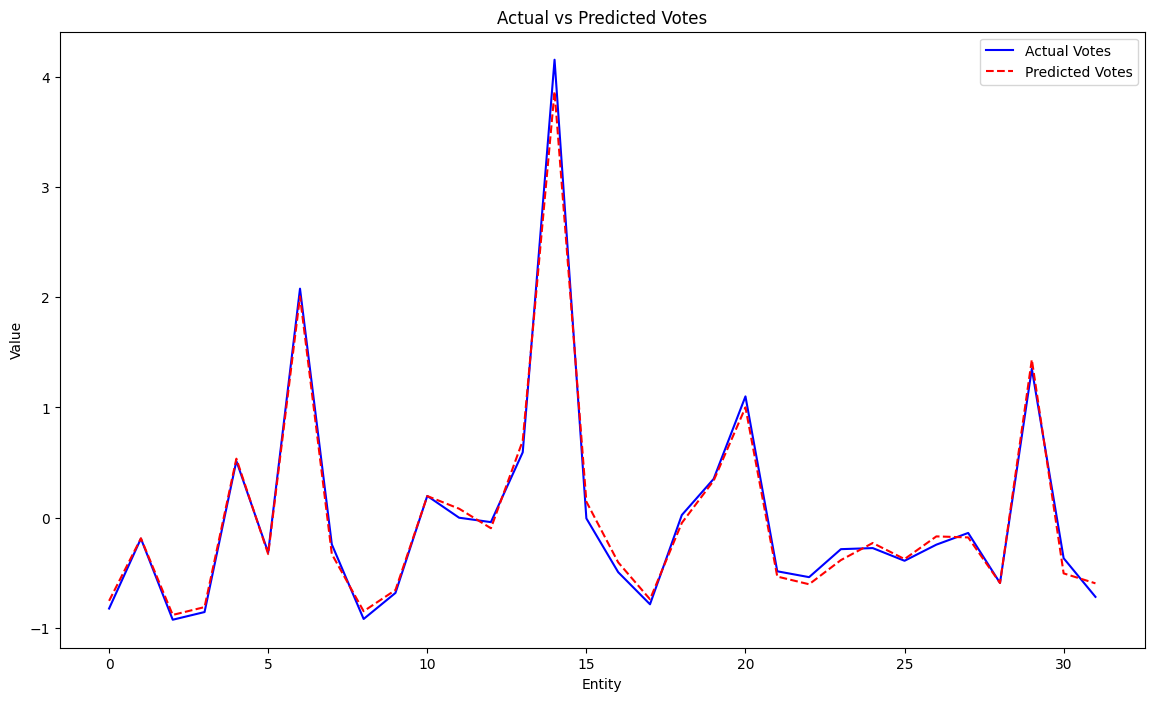

In [27]:
#Plot the columns COMPETITOR_Votes_2024	and Predicted
plt.figure(figsize=(14, 8))
plt.plot(Trial.index, Trial['COMPETITOR_Votes_2024'], 'b-', label='Actual Votes')
plt.plot(Trial.index, Trial['Predicted'], 'r--', label='Predicted Votes')
plt.xlabel('Entity')
plt.ylabel('Value')
plt.title('Actual vs Predicted Votes')
plt.legend()
plt.show()


Yes... this looks similar to the testing/training process!

# Conclusions

Now that I have experimented with 5 different models I would like to create a simple snippet to recreate the 5 models performance in only one screen.

In [28]:

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Lasso': Lasso(alpha=0.1),
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Train and evaluate models
conclusions = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    conclusions.append({
        'Model': name,
        'Train MSE': mse_train,
        'Train R²': r2_train,
        'Test MSE': mse_test,
        'Test R²': r2_test
    })

# Convert conclusions to DataFrame
conclusions_df = pd.DataFrame(conclusions)

# Print the results:

# Sort the results by Test R² in descending order
conclusions_df = conclusions_df.sort_values(by='Test R²', ascending=False)


In [29]:
conclusions_df.head(10)

,Model,Train MSE,Train R²,Test MSE,Test R²
1,Lasso,1.499826e-02,0.986565,0.010197,0.979970
3,Ridge,2.200572e-03,0.998029,0.047715,0.906278
2,Linear Regression,2.753781e-30,1.000000,0.054846,0.892273
0,Random Forest,1.004724e-01,0.910003,0.067189,0.868028
4,Decision Tree,0.000000e+00,1.000000,0.127489,0.749587


Make it visual:

In [30]:
# Print the sorted results with color coding
for i, row in conclusions_df.iterrows():
    if i == 1:
        # Best model
        color = '\033[92m'  # Green
    elif i == len(conclusions_df) -1:
        # Worst model
        color = '\033[91m'  # Red
    else:
        # Intermediate models
        color = '\033[93m'  # Yellow

    print(color + row.to_string() + '\033[0m')


Model           Lasso
Train MSE    0.014998
Train R²     0.986565
Test MSE     0.010197
Test R²       0.97997
Model           Ridge
Train MSE    0.002201
Train R²     0.998029
Test MSE     0.047715
Test R²      0.906278
Model        Linear Regression
Train MSE                  0.0
Train R²                   1.0
Test MSE              0.054846
Test R²               0.892273
Model        Random Forest
Train MSE         0.100472
Train R²          0.910003
Test MSE          0.067189
Test R²           0.868028
Model        Decision Tree
Train MSE              0.0
Train R²               1.0
Test MSE          0.127489
Test R²           0.749587


# Final Decision!

This time I will stay with Lasso due to :

1) The simplicity of its equation:
Lasso Equation: Y = + 0.57 * AMLO_2018 + 0.20 * Poberty_Habitants + 0.21 * Public_Hospital_Users

2) The great acuracy it has in training and Testing Datasets.

3) My entity Model has low information at this point so in general this is a good way to predict votes. 

If in my next project I can get votes per city and demographic, economic and social information per city it will be interesting to see if this model can also generalize to more data rows!

In [31]:
#pip freeze > requirements.txt